# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
#Descargamos el archivo taxi csv y lo transformamos el dato de obj a datatime
df = pd.read_csv("/datasets/taxi.csv", parse_dates=["datetime"])

In [3]:
#Imprimir los 5 primeros datos del df
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
#Info. del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [5]:
#Para verificar si las fechas y horas están en orden cronológico.
df.sort_index(inplace=True)
print(df.index.is_monotonic_increasing)
print(df.info())

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB
None


In [6]:
#Visualizacion de datos 
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [7]:
#Verificar que no hay valores nulos
df.isna().sum()

datetime      0
num_orders    0
dtype: int64

In [8]:
#Checar si hay valores "0"
(df["num_orders"] == 0).sum()

537

In [9]:
#Ver en que columna esta el valor "0"
df[df["num_orders"] == 0]

,datetime,num_orders
32,2018-03-01 05:20:00,0
34,2018-03-01 05:40:00,0
35,2018-03-01 05:50:00,0
36,2018-03-01 06:00:00,0
37,2018-03-01 06:10:00,0
...,...,...
25379,2018-08-24 05:50:00,0
25666,2018-08-26 05:40:00,0
26106,2018-08-29 07:00:00,0
26245,2018-08-30 06:10:00,0


In [10]:
#Visualizar el porcentaje de datos de tipo 0 en el df, si son pocos los eliminamos 
(df["num_orders"] == 0).mean()

0.020267210144927536

In [11]:
#Rellenamos valores faltantes con iel promedio.
promedio = df["num_orders"].mean()
print(promedio)

14.070463466183575


In [12]:
#LLenamos los datos de tipo "0" con el promedio
df["num_orders"] = df["num_orders"].fillna(promedio)

In [13]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
#Cambiar nombre de columnas
df = df.rename(columns={"datetime": "Fecha_Hora"})
df = df.rename(columns={"num_orders": "Num_ordenes"})
print(df.head())

           Fecha_Hora  Num_ordenes
0 2018-03-01 00:00:00            9
1 2018-03-01 00:10:00           14
2 2018-03-01 00:20:00           28
3 2018-03-01 00:30:00           20
4 2018-03-01 00:40:00           32


In [15]:
#Quitar de indice la fecha y hora
df.set_index("Fecha_Hora", inplace=True)
df

,Num_ordenes
Fecha_Hora,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Datos de temperatura diaria:


,Num_ordenes
Fecha_Hora,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


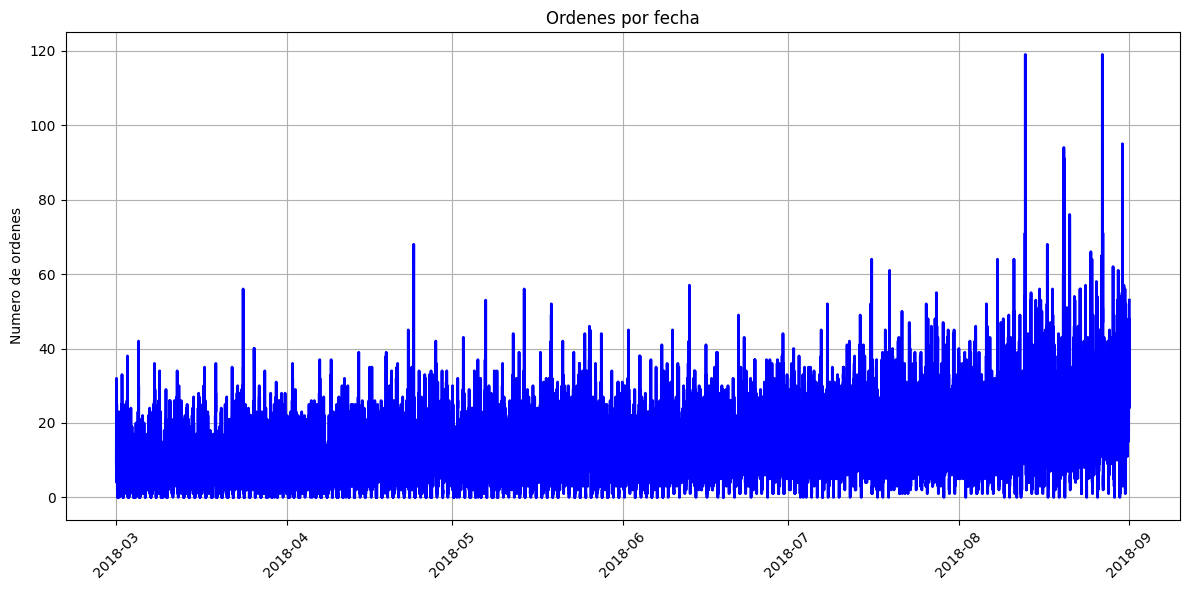

In [16]:
#Graficar valores, para mejorar la visualizacion 
print("Datos de temperatura diaria:")
display(df)

y = df["Num_ordenes"]

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(y, color='blue', linewidth=2, label='Órdenes', linestyle='-')

ax.set_ylabel("Numero de ordenes")
ax.set_title("Ordenes por fecha")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Muy bien! En esta etapa mostraste dominio al cargar y limpiar los datos, verificando el orden temporal y gestionando los valores cero de forma adecuada. La visualización final es clara y permite apreciar las variaciones horarias en la demanda de taxis. </div>


## Análisis

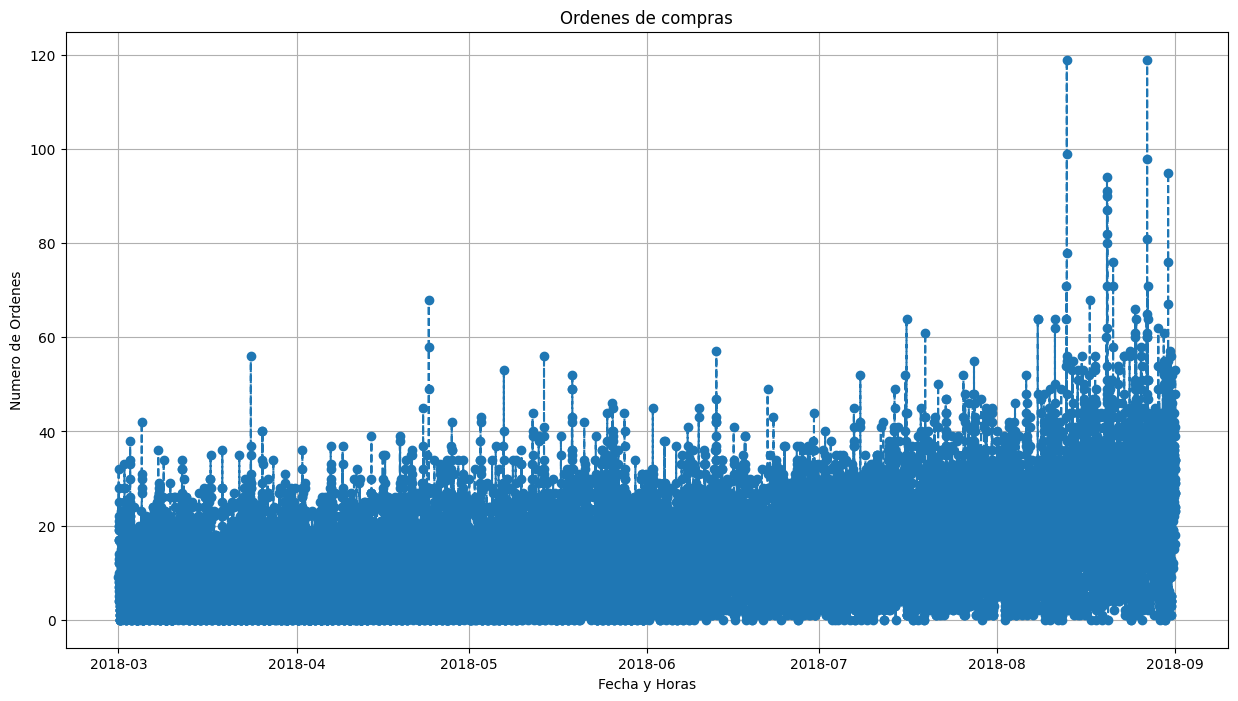

In [17]:
#Graficar para ver mejor los datos en serie temporal 
plt.figure(figsize=(15,8))
plt.plot(df.index, df['Num_ordenes'], marker='o', linestyle='--')
plt.title("Ordenes de compras")
plt.xlabel("Fecha y Horas")
plt.ylabel("Numero de Ordenes")
plt.grid(True)
plt.show()

In [18]:
#Remuestreo por hora, dia, semana y mes
df_h = df.resample("H").mean()
print(df_h.head())
#Remuestreo por dia
df_d = df.resample("D").mean()
print(df_d.head())
#Remuestreo por semana
df_w = df.resample("W").mean()
print(df_w.head())
#Remuestreo al mes 
df_m = df.resample("M").mean()
print(df_m.head())

                     Num_ordenes
Fecha_Hora                      
2018-03-01 00:00:00    20.666667
2018-03-01 01:00:00    14.166667
2018-03-01 02:00:00    11.833333
2018-03-01 03:00:00    11.000000
2018-03-01 04:00:00     7.166667
            Num_ordenes
Fecha_Hora             
2018-03-01     9.472222
2018-03-02    10.458333
2018-03-03     8.958333
2018-03-04     7.923611
2018-03-05     8.743056
            Num_ordenes
Fecha_Hora             
2018-03-04     9.203125
2018-03-11     9.336310
2018-03-18     9.707341
2018-03-25     9.689484
2018-04-01     9.674603
            Num_ordenes
Fecha_Hora             
2018-03-31     9.580645
2018-04-30    10.634028
2018-05-31    12.280466
2018-06-30    13.867130
2018-07-31    16.667787


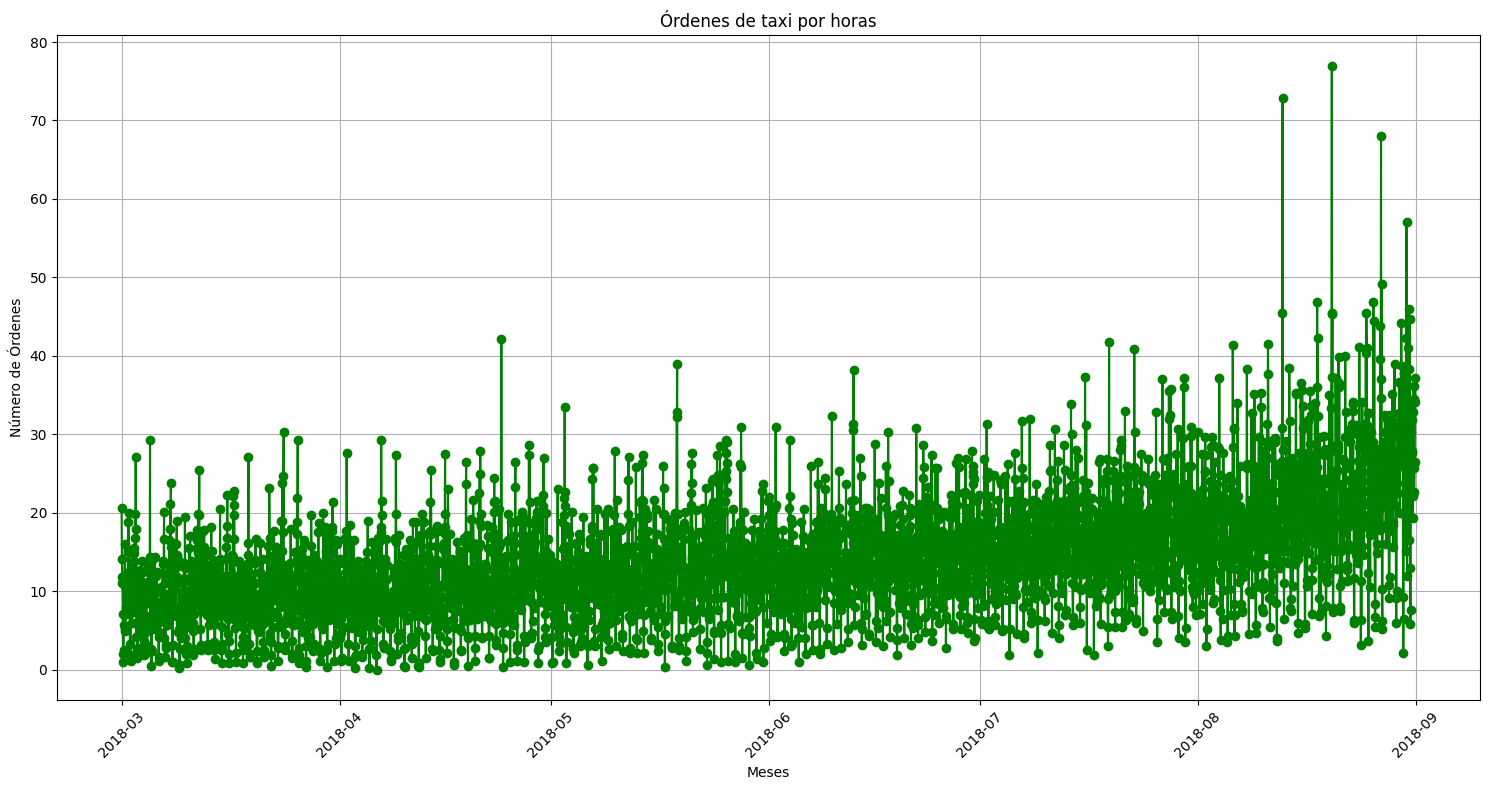

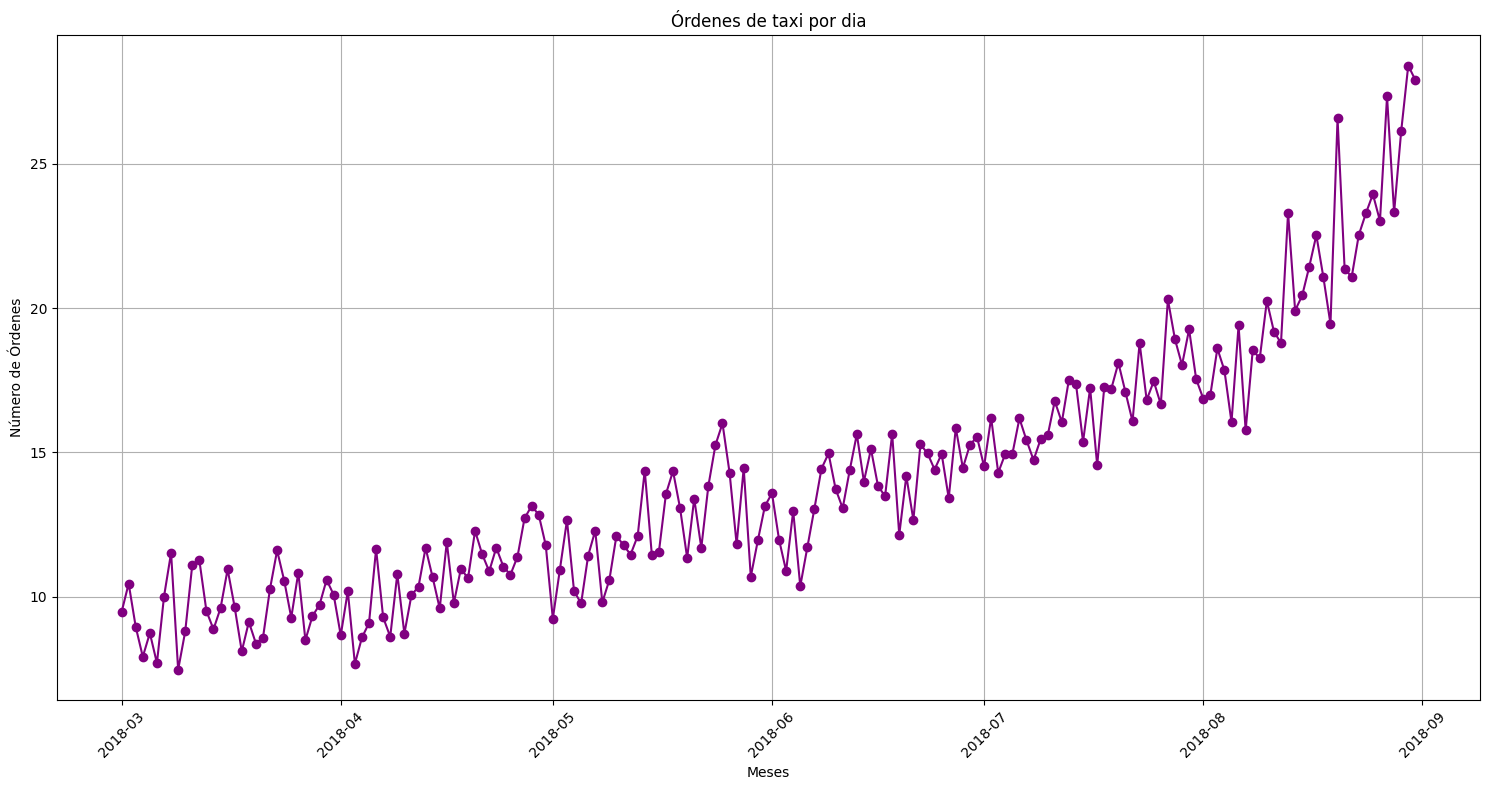

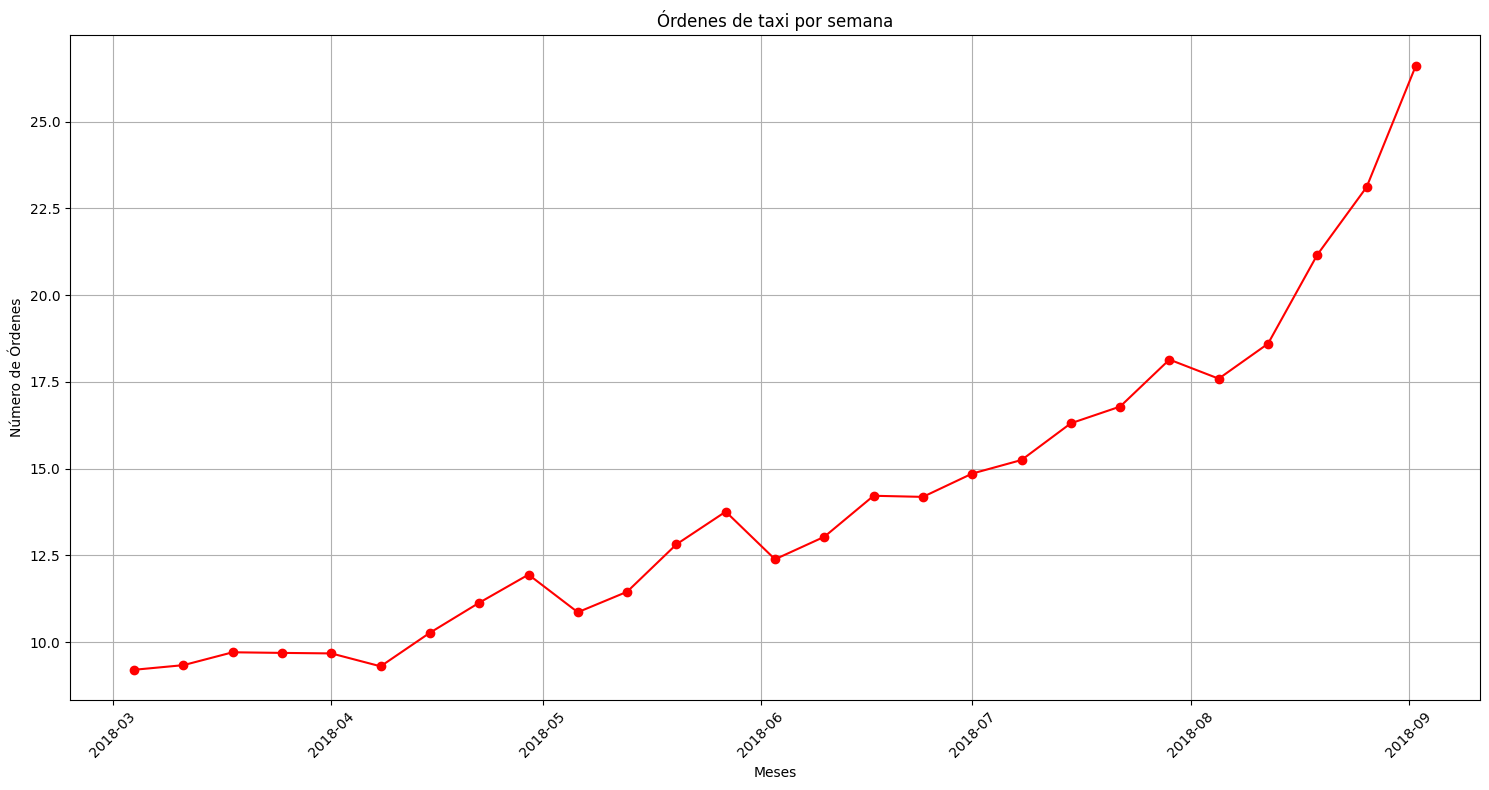

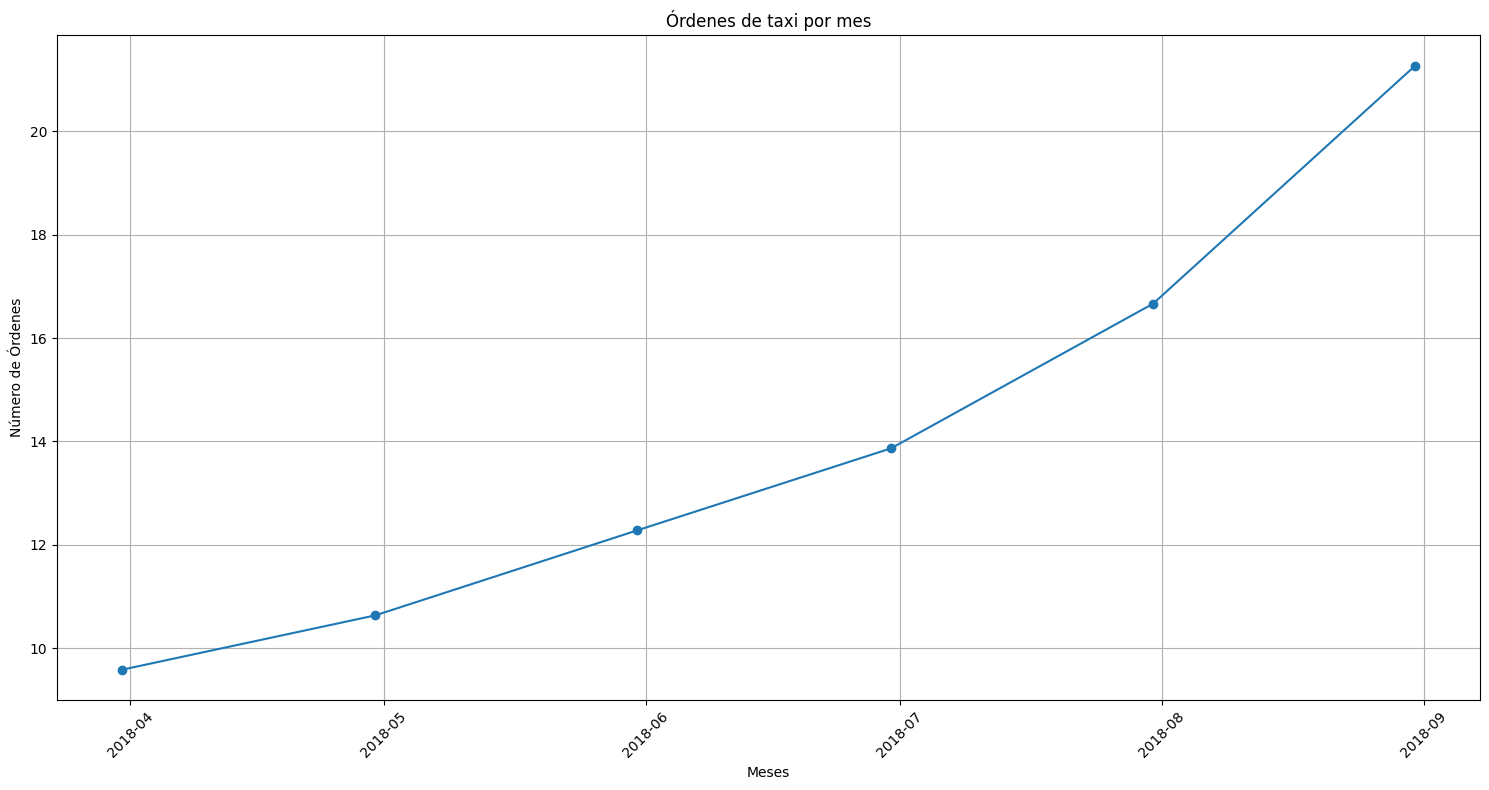

In [19]:
# Trazo de grafica de numero de ordenes por hora, dia, seamana y mes

# Trazo de grafica de numero de ordenes por hora.
plt.figure(figsize=(15, 8))
plt.plot(df_h.index, df_h["Num_ordenes"], marker="o", linestyle="-", color="green")
plt.title("Órdenes de taxi por horas")
plt.xlabel("Meses")
plt.ylabel("Número de Órdenes")
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Trazo de grafica de numero de ordenes por dia.
plt.figure(figsize=(15, 8))
plt.plot(df_d.index, df_d["Num_ordenes"], marker="o", linestyle="-", color="purple")
plt.title("Órdenes de taxi por dia")
plt.xlabel("Meses")
plt.ylabel("Número de Órdenes")
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Trazo de grafica de numero de ordenes por semana.
plt.figure(figsize=(15, 8))
plt.plot(df_w.index, df_w["Num_ordenes"], marker="o", linestyle="-", color="red")
plt.title("Órdenes de taxi por semana")
plt.xlabel("Meses")
plt.ylabel("Número de Órdenes")
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Trazo de grafica de numero de ordenes mensuales
plt.figure(figsize=(15, 8))
plt.plot(df_m.index, df_m["Num_ordenes"], marker="o", linestyle="-")
plt.title("Órdenes de taxi por mes")
plt.xlabel("Meses")
plt.ylabel("Número de Órdenes")
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Con las graficas mostradas podemos ver la visaulizacion de los pedidos de taxis en sus diferentes etapas de tiempo. Y en cual es mas facil de distinguir la tendencia.

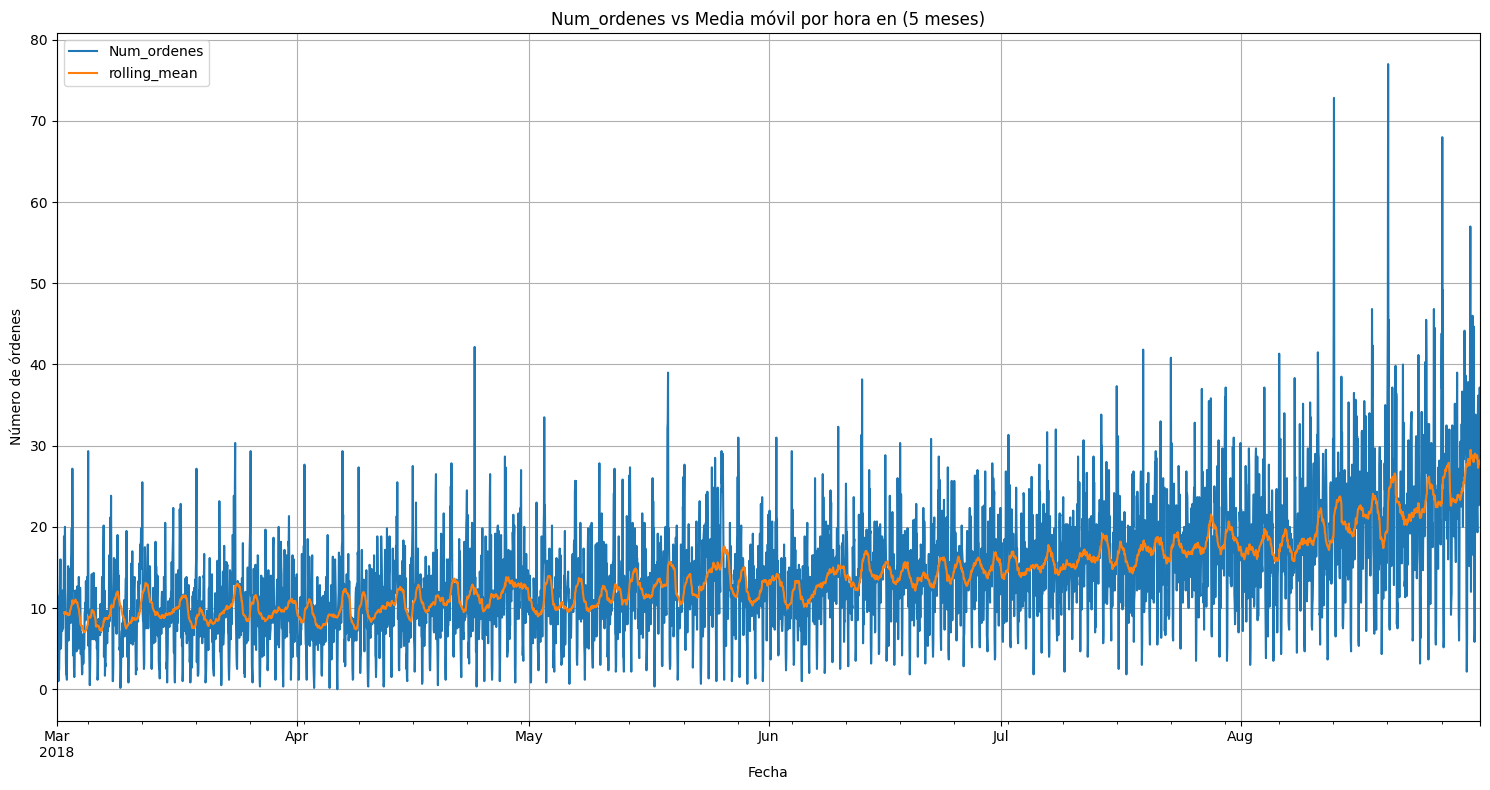

In [20]:
#Usamos la media mobil para redicir fluctuaciones
df_h['rolling_mean'] = df_h.rolling(24).mean()# Utilizamos la escala de 24 horas
df_h[['Num_ordenes', 'rolling_mean']].plot(figsize=(15, 8), title='Num_ordenes vs Media móvil por hora en (5 meses)')
plt.ylabel('Número de órdenes')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que se tiene una tendencia alzista entre mas se acercan los meses finales del año.

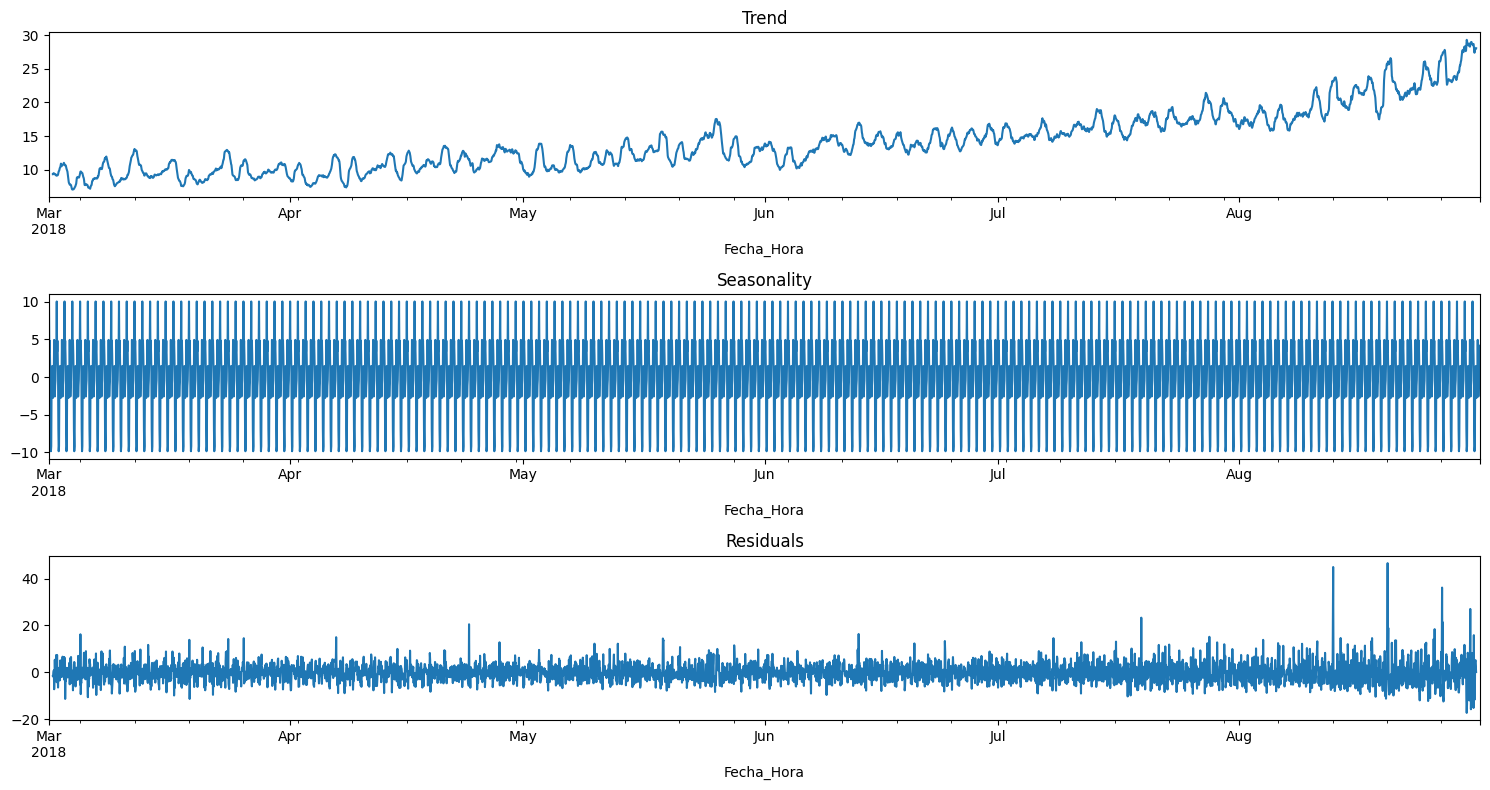

In [21]:
#Tendencias y estacionalidad para un mejor analisis

# Descomposición estacional (especifica el periodo)
decomposed = seasonal_decompose(df_h['Num_ordenes'], model='additive', period=24)

plt.figure(figsize=(15,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title("Trend")
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title("Seasonality")
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title("Residuals")
plt.tight_layout()

<AxesSubplot:xlabel='Fecha_Hora'>

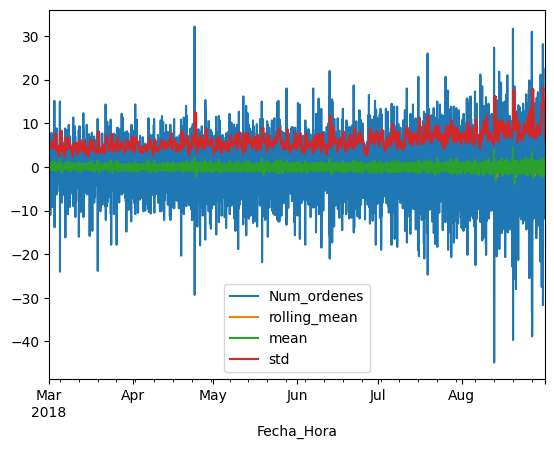

In [22]:
#Procedemos con las difeencias en series temporales (shift)
df_h -= df_h.shift() 
df_h['mean'] = df_h['Num_ordenes'].rolling(15).mean()
df_h['std'] = df_h['Num_ordenes'].rolling(15).std()
df_h.plot()

Ya con todo estos graficos podemos mejorar el analisis exploratorio,podemos ver que nuestra serie temporal, tiene una tendencia creciente, asi mismo es una serie de tiempo estacional, tiene si media sin cambios y su varianza tiene una lijera tendencia creciente, ya que estan limpios y son errores comenzamos a realizar los modelos, para calcular el error cuadratico medio.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente trabajo en esta sección. El remuestreo está bien aplicado y las visualizaciones permiten entender claramente la evolución y estacionalidad de los pedidos. También es positivo ver la incorporación de media móvil y descomposición para enriquecer el análisis exploratorio. </div>


## Formación

In [23]:
#Librerias
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf

In [24]:
#convertir el df en serie
serie_h = df_h["Num_ordenes"].dropna()
serie_h

Fecha_Hora
2018-03-01 01:00:00    -6.500000
2018-03-01 02:00:00    -2.333333
2018-03-01 03:00:00    -0.833333
2018-03-01 04:00:00    -3.833333
2018-03-01 05:00:00    -6.166667
                         ...    
2018-08-31 19:00:00   -11.833333
2018-08-31 20:00:00     3.000000
2018-08-31 21:00:00     0.833333
2018-08-31 22:00:00    10.666667
2018-08-31 23:00:00    -3.000000
Freq: H, Name: Num_ordenes, Length: 4415, dtype: float64

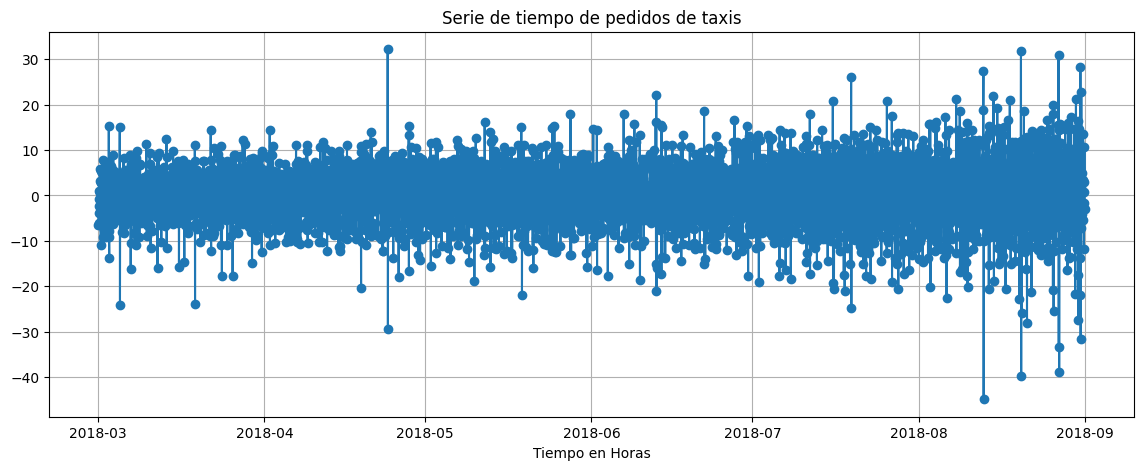

Valores ACF:
[ 1.         -0.28951836 -0.01869191 -0.09548215 -0.07141185 -0.03562661
 -0.06018668  0.04666924  0.07732485 -0.04330725 -0.08152707  0.05278721
  0.04387143  0.04652722 -0.04249447 -0.07735172  0.07206127  0.03856355
 -0.04289425 -0.04832214 -0.03224461 -0.12302081 -0.01343776  0.0209616
  0.36139034]
Valores 
PACF:
[ 1.         -0.28951836 -0.11189164 -0.1479968  -0.16901449 -0.15374256
 -0.19144522 -0.11489691 -0.01772888 -0.09377318 -0.19476581 -0.09460764
 -0.02564762  0.0189274  -0.0429591  -0.14694082 -0.0249939   0.0761427
  0.00744444 -0.09463714 -0.13830408 -0.2757012  -0.28397059 -0.33141716
  0.0488387 ]


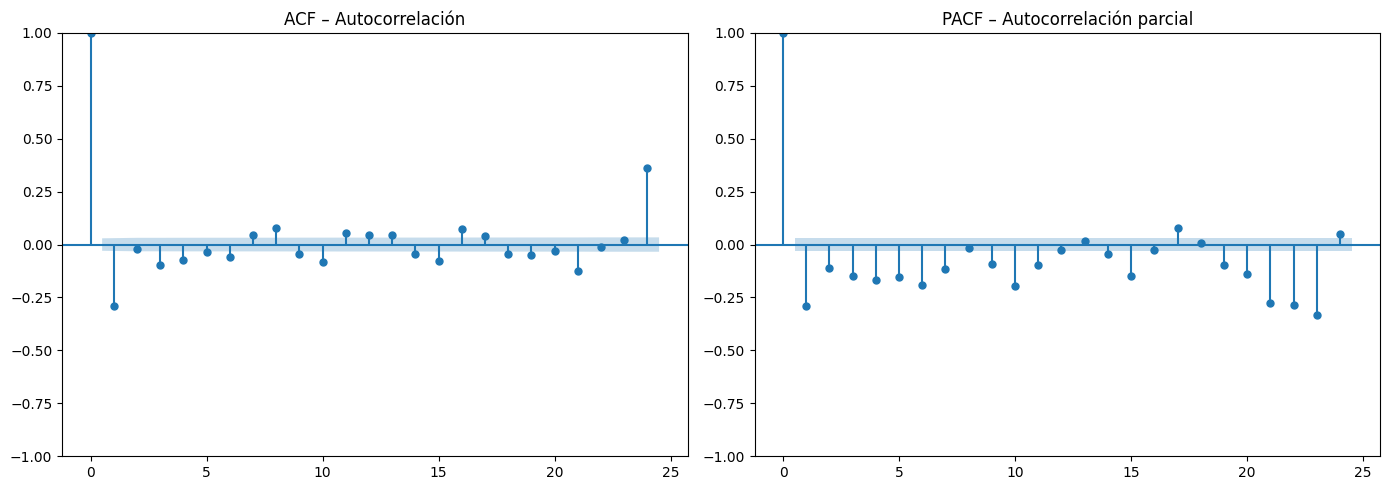

In [25]:
#ACF (Función de Autocorrelación) y PACF (Función de Autocorrelación Parcial)
#Trazamos la serie 
plt.figure(figsize=(14,5))
plt.plot(serie_h, marker="o")
plt.title("Serie de tiempo de pedidos de taxis")
plt.ylabel=("Ordenes de taxis")
plt.xlabel("Tiempo en Horas")
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

plot_acf(serie_h, lags=24, ax=axes[0])
axes[0].set_title("ACF – Autocorrelación")

plot_pacf(serie_h, lags=24, ax=axes[1], method="ywm")
axes[1].set_title("PACF – Autocorrelación parcial")

# Calcular hasta 24 lags
acf_vals = acf(serie_h, nlags=24)
pacf_vals = pacf(serie_h, nlags=24, method='ywm')

# Mostrar resultados
print("Valores ACF:")
print(acf_vals)

print("Valores \nPACF:")
print(pacf_vals)

plt.tight_layout()
plt.show()

🧩 Comportamientos típicos de ACF y PACF

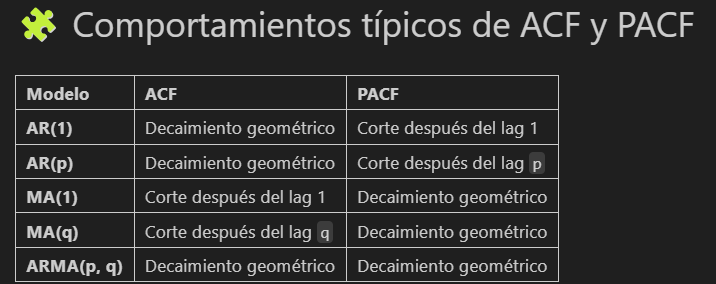

El primer rezago (lag 1) tiene una autocorrelación negativa fuerte de casi (-0.29).
A partir de ahí los valores caen rápido y fluctúan cerca de cero.

No hay un patrón de decaimiento lento ni corte claro en lag 1, por lo que usaremos MA(1) y porque la ACF se corta bruscamente después del primer lag.

No hay un corte brusco claro. Más bien es una disminución gradual y tiene tendencia cercana a 0 con los sog. valores

#### *Recomendación de modelo ARIMA*

ACF corta en lag 1 → sugiere q = 1

PACF tiene forma descendente, pero significativa en los primeros lags → sugiere p ≈ 1 o 2

Asumiendo que tu serie es estacionaria (d = 0), entonces el modelo ideal sería

                               SARIMAX Results                                
Dep. Variable:            Num_ordenes   No. Observations:                 4415
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13843.637
Date:                Tue, 01 Jul 2025   AIC                          27695.275
Time:                        23:34:21   BIC                          27720.846
Sample:                    03-01-2018   HQIC                         27704.294
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      3.629      0.000       0.002       0.006
ar.L1          0.4548      0.010     44.212      0.000       0.435       0.475
ma.L1         -0.9941      0.002   -626.020      0.0

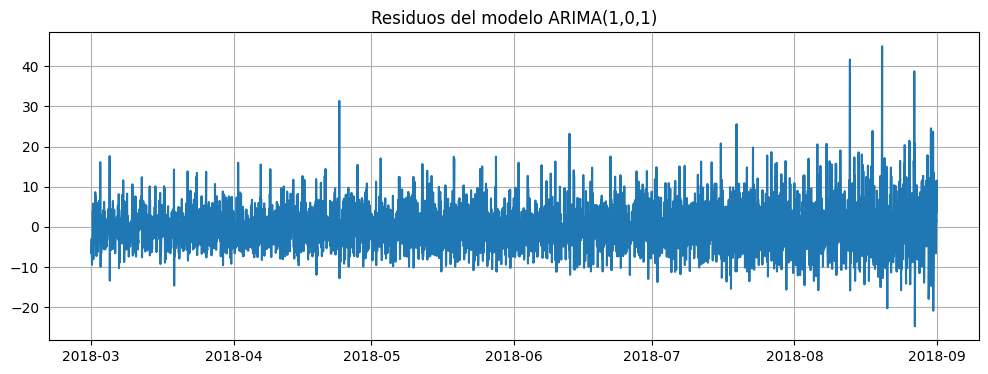

In [26]:
#Modelo Arima
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(serie_h, order=(1, 0, 1))
resultado = modelo.fit()
print(resultado.summary())

residuos = resultado.resid

plt.figure(figsize=(12,4))
plt.plot(residuos)
plt.title("Residuos del modelo ARIMA(1,0,1)")
plt.grid(True)
plt.show()

In [27]:
#Dividir valores en train y test
train, test = train_test_split(df_h, shuffle=False, test_size=0.2)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-31 23:00:00


In [28]:
#Entrenar los valores para una regrecion lineal
def make_features(df_h, max_lag, rolling_mean_size):
    df_h['year'] = df_h.index.year
    df_h['month'] = df_h.index.month
    df_h['day'] = df_h.index.day
    df_h['dayofweek'] = df_h.index.dayofweek

    for lag in range(1, max_lag + 1):
        df_h['lag_{}'.format(lag)] = df_h["Num_ordenes"].shift(lag)

    df_h['rolling_mean'] = (
        df_h["Num_ordenes"].shift().rolling(rolling_mean_size).mean()
    )

make_features(df_h, 6, 10)

train, test = train_test_split(df_h, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(["Num_ordenes"], axis=1)
target_train = train["Num_ordenes"]
features_test = test.drop(["Num_ordenes"], axis=1)
target_test = test["Num_ordenes"]
# < escribe tu código aquí >

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('EAM para el conjunto de entrenamiento:', mean_absolute_error(target_train, pred_train)
) # < escribe tu código aquí >)
print('EAM para el conjunto de prueba:', mean_absolute_error(target_test, pred_test))

rmse_lr = mean_squared_error(target_test, pred_test, squared=False)
print("RMSE Regresión Lineal:", rmse_lr)

EAM para el conjunto de entrenamiento: 3.1320939764290894
EAM para el conjunto de prueba: 4.990587375254555
RMSE Regresión Lineal: 6.37408241419071


In [29]:

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(features_train, target_train)

pred_rf = model_rf.predict(features_test)
rmse_rf = mean_squared_error(target_test, pred_rf, squared=False)
print("RMSE Random Forest:", rmse_rf)

RMSE Random Forest: 6.715554064487005


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Buen trabajo en esta etapa. Lograste construir y ajustar modelos con distintas metodologías, desde ARIMA hasta regresión lineal y Random Forest. Además, incluiste la generación de características relevantes y evaluaste correctamente el desempeño con métricas apropiadas. Una implementación sólida y bien estructurada. </div>


## Prueba

TypeError: 'str' object is not callable

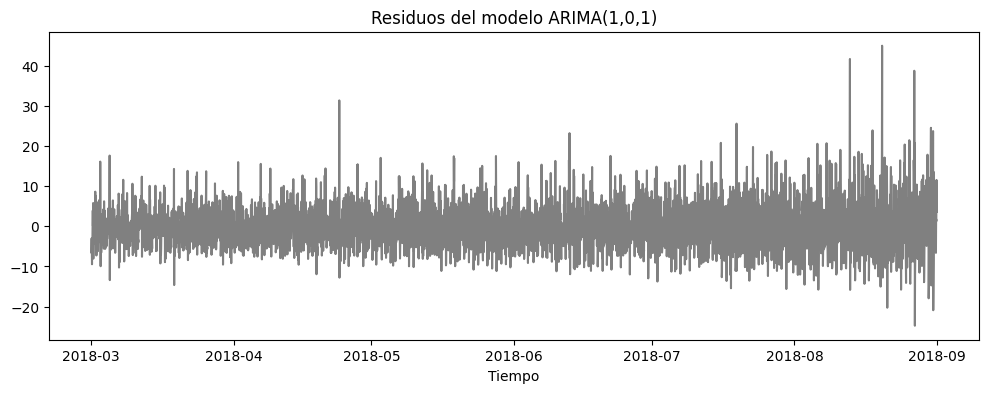

In [30]:
residuos = resultado.resid

plt.figure(figsize=(12, 4))
plt.plot(residuos, color='gray')
plt.title("Residuos del modelo ARIMA(1,0,1)")
plt.xlabel("Tiempo")
plt.ylabel("Residuo")
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

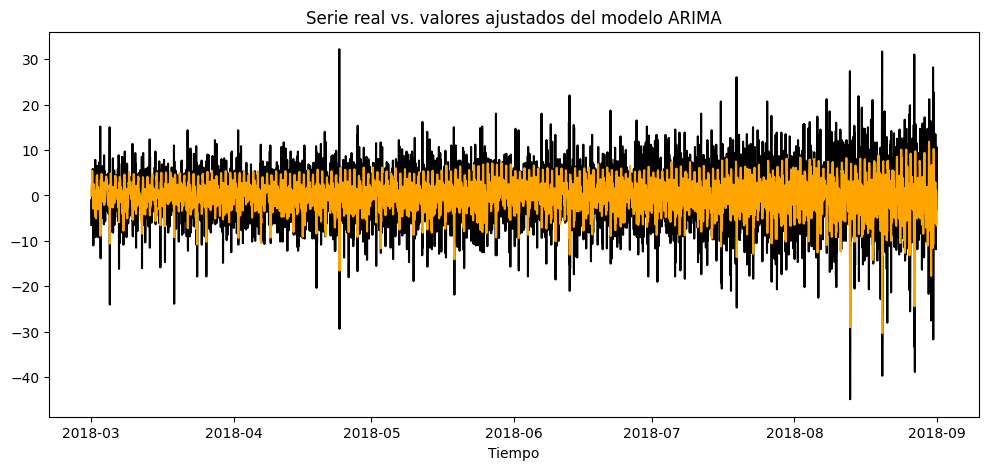

In [31]:
predicciones = resultado.fittedvalues

plt.figure(figsize=(12, 5))
plt.plot(serie_h, label='Serie real', color='black')
plt.plot(predicciones, label='Predicción ARIMA(1,0,1)', color='orange')
plt.title("Serie real vs. valores ajustados del modelo ARIMA")
plt.xlabel("Tiempo")
plt.ylabel("Número_de_órdenes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
y_real = serie_h
y_pred = resultado.fittedvalues

# Asegurar índices iguales (por si hay desfase)
y_pred = y_pred.reindex(y_real.index)

# Calcular errores
mae = mean_absolute_error(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)

# Mostrar resultados
print(f"MAE  (Error absoluto medio):     {mae:.4f}")
print(f"MSE  (Error cuadrático medio):   {mse:.4f}")
print(f"RMSE (Raíz del ECM):             {rmse:.4f}")

MAE  (Error absoluto medio):     4.2044
MSE  (Error cuadrático medio):   30.9722
RMSE (Raíz del ECM):             5.5653


In [34]:
#RESUMEN DE LOS 3 MODELOS 
print("REGESION LINEAL RMSE:", rmse_lr)
print("RANDOM FOREST RMSE:", rmse_rf)
print(f"MODELO ARIMA RMSE (Raíz del ECM):{rmse:.4f}")

REGESION LINEAL RMSE: 6.37408241419071
RANDOM FOREST RMSE: 6.715554064487005
MODELO ARIMA RMSE (Raíz del ECM):5.5653


## *Como conclucion podemos ver que los 3 modelos obtuvieron un RSME muy parecido entre ellos por lo que predecimos que los 3 estan muy bien entrenados y son menores de 48 como lo solicitaba el proyecto, aun que nos quedamos con el modelo de ARIMA ya que este es el mas cercano a 0*

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Muy bien resuelto! Mostraste una evaluación clara de los tres modelos aplicando métricas apropiadas y concluiste correctamente que todos cumplen con el umbral de calidad solicitado. El análisis final es coherente y justifica de forma razonada la elección del modelo ARIMA. </div>


## Comentario general del revisor 



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de datos temporales, desde la limpieza inicial hasta el ajuste y comparación de modelos predictivos. La estructura de tu notebook es clara, tus visualizaciones son pertinentes y el análisis de resultados es sólido.  

#### Puntos Positivos:

* **Procesamiento de datos:** Muy buen tratamiento de valores cero y transformación temporal precisa.
* **Visualización y análisis gráfico:** Uso correcto del remuestreo, media móvil y descomposición estacional para interpretar tendencias.
* **Ingeniería de características:** Incorporación de rezagos y variables temporales relevantes para modelos de regresión.
* **Comparación de modelos:** Evaluación adecuada con métricas sólidas y justificación acertada de la elección del mejor modelo.

Tu trabajo refleja compromiso y una buena comprensión del modelado de series temporales. ¡Sigue cultivando esta claridad en tus futuros análisis! </div>
